In [97]:
#Imports
import pandas as pd
import numpy as np 
import nilearn 
import nibabel as nib
import os
import matplotlib.pyplot as plt
import glob

from nilearn import plotting, image
from nilearn.glm.first_level import compute_regressor
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm.first_level import FirstLevelModel
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_design_matrix
from nilearn import image
from nilearn import masking
from numpy import savetxt
from nilearn.maskers import NiftiSpheresMasker
from nilearn.reporting import get_clusters_table


#Submit job to HPC
#subprocess.call(['qsub', '-l', 'procs=1,mem=24gb,walltime=12:00:00 -I'])

# Init variables
init_folder='/home/traaffneu/margal/code/multirat_se/script/'
analysis_folder='/project/4180000.19/multirat_stim/rabies/preprocess'
            
# Data path
template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'
metadata_path ='/home/traaffneu/margal/code/multirat_se/script/table/metadata_stand.tsv'
mask = '/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Mask.nii'


# Paths for the directories

    # - First level analysis - 
output_dir = '/project/4180000.19/multirat_stim/rabies_test/first_level_analysis/'
matrix_dir = os.path.join(output_dir, 'matrix/')
image_dir = os.path.join(output_dir, 'image/')
residuals_dir = os.path.join(output_dir, 'residuals/')
z_score_dir = os.path.join(output_dir, 'z_score/')
beta_dir = os.path.join(output_dir, 'beta_estimates/')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(matrix_dir):
    os.makedirs(matrix_dir)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
if not os.path.exists(residuals_dir):
    os.makedirs(residuals_dir)
if not os.path.exists(z_score_dir):
    os.makedirs(z_score_dir)
if not os.path.exists(beta_dir):
    os.makedirs(beta_dir)
    
    # - Roi data - 
roi_dir = os.path.join(output_dir, 'roi/')
roi_timeseries_dir = os.path.join(output_dir, 'roi/timeseries/')
roi_residuals_dir = os.path.join(output_dir, 'roi/residuals/')
roi_effect_size_dir = os.path.join(output_dir, 'roi/effect_size/')
roi_effect_variance_dir = os.path.join(output_dir, 'roi/effect_variance/')
roi_predicted_timeseries_dir = os.path.join(output_dir, 'roi/predicted_timeseries/')

if not os.path.exists(roi_dir):
    os.makedirs(roi_dir)
if not os.path.exists(roi_timeseries_dir):
    os.makedirs(roi_timeseries_dir)
if not os.path.exists(roi_residuals_dir):
    os.makedirs(roi_residuals_dir)  
if not os.path.exists(roi_effect_size_dir):
    os.makedirs(roi_effect_size_dir)
if not os.path.exists(roi_effect_variance_dir):
    os.makedirs(roi_effect_variance_dir)
if not os.path.exists(roi_predicted_timeseries_dir):
    os.makedirs(roi_predicted_timeseries_dir)

In [2]:
metadata_rabies='/home/traaffneu/margal/code/multirat_se/script/table/metadata_rabies.tsv'
df = pd.read_csv(metadata_rabies, sep='\t')
df = df.loc[(df['exclude'] != 'yes')]

In [3]:
#Fitted time course of the rat HRF --> Parameters: b = 2.0,   p1 = 7.4, p2 = 8.9 and V = 1.5), peak 0.1 ms 

import numpy as np
from scipy.stats import gamma

def rat_hrf(tr, n_trs):
    
    b = 2.0   # Define the parameters of the rat HRF
    p1 = 7.4
    p2 = 8.9
    V = 1.5
    
    t = np.arange(0, n_trs*tr, tr)     #calculates the exact sequence of time points that correspond to each TR --> time points for the HRF in sec

    hrf_model = ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1))) - V * ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1)))



    # plt.plot(t, hrf_model)
    # plt.xlabel('Time (s)')
    # plt.ylabel('HRF amplitude')
    # plt.title('Rat HRF Model')
    # plt.show()


#rat_func(tr=1.5, n_trs=100)


index: 21
subj: 200302
n_stimulation: 20


/scratch/margal/49126681.dccn-l029.dccn.nl/ipykernel_1413/1671994154.py:15: RuntimeWarning: invalid value encountered in power
  hrf_model = ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1))) - V * ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1)))
/scratch/margal/49126681.dccn-l029.dccn.nl/ipykernel_1413/2375464240.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events_list = events.append(events)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:74: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn("'trial_type' column not found "


Contrasts:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index: 22
subj: 200303
n_stimulation: 20


/scratch/margal/49126681.dccn-l029.dccn.nl/ipykernel_1413/1671994154.py:15: RuntimeWarning: invalid value encountered in power
  hrf_model = ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1))) - V * ((t-b)**(p1-1) * np.exp(-(t-b)/p2) / (p2**p1 * np.math.gamma(p1)))
/scratch/margal/49126681.dccn-l029.dccn.nl/ipykernel_1413/2375464240.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events_list = events.append(events)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:74: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn("'trial_type' column not found "


Contrasts:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/_utils/glm.py:335: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1. / X)


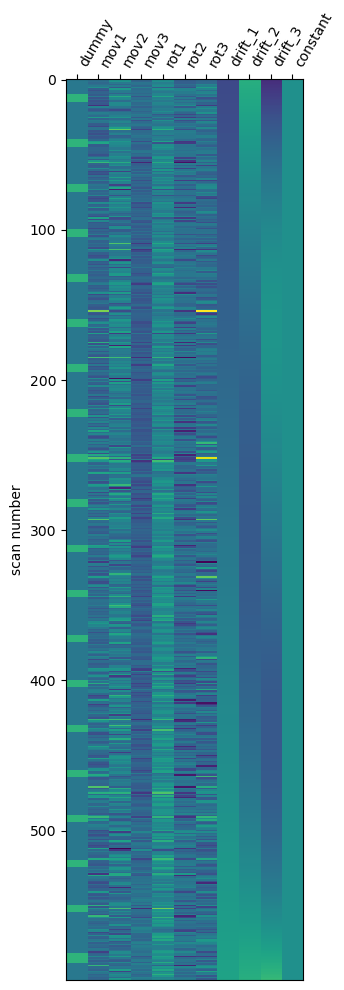

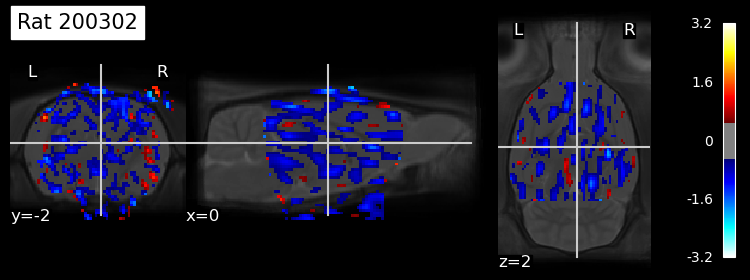

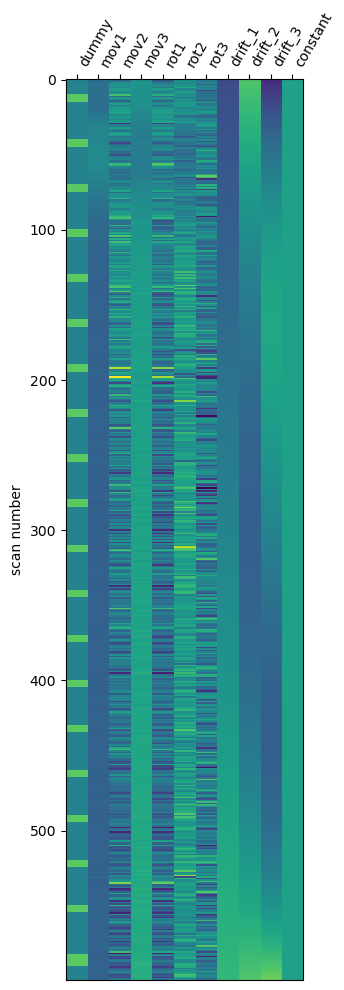

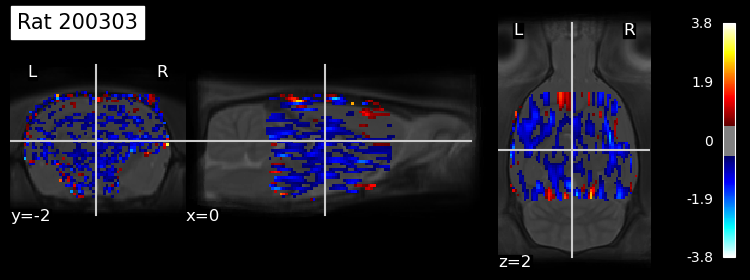

In [137]:
# ---------- FIRST LEVEL ANALYSIS ------------

df = pd.read_csv(metadata_path, sep='\t')
df = df.loc[(df['exclude'] != 'yes')]

for index in range(21, 23):
    
    subj_num=str(df.iloc[index]['rat.sub'])[:-2]
    print('index:', index)
    print('subj:', subj_num)
    
    subject_path = glob.glob(analysis_folder + "/sub-0{}_ses-1/bold_datasink/commonspace_bold/*/*/*.nii.gz".format(subj_num, subj_num, subj_num))[0]

    
    # --- Specify the rat hrf --- 
    
    tr = (df.iloc[index]['func.TR'])
    n_trs = np.count_nonzero((np.matrix(df.iloc[index]['func.sensory.onset']))) #count number of stimulation, number of onset
    hrf_model = rat_hrf(tr, n_trs)
    print('n_stimulation:', n_trs)
    
    func_img = nib.load(subject_path)                                
    header = func_img.header

    n_scans = func_img.shape[3]    
    frame_times = np.arange(n_scans) * tr                             # corresponding frame times    
    

    # --- Events regressor --- 
    
    onset = np.matrix(df.iloc[index]['func.sensory.onset']).A[0]
    duration = np.matrix(df.iloc[index]['func.sensory.duration']).A[0]
    events = pd.DataFrame({'onset': onset,'duration': duration})
    events_list = events.append(events)
    
    
    # --- Motion regressors ---

    cofounders_file = 'sub-0{}_ses-1_run-1_bold_RAS_combined_confounds.csv'.format(subj_num)
    cofounders_path = glob.glob(analysis_folder +"/sub-0{}_ses-1/confounds_datasink/confounds_csv/*/*/*.csv".format(subj_num, subj_num, subj_num, subj_num))[0]


    cofounders = pd.read_csv(cofounders_path, sep=',')

    motion_names = ['mov1', 'mov2', 'mov3', 'rot1', 'rot2', 'rot3']
    motion = np.array(cofounders[motion_names])
    
    
    # --- Compute design matrix --- 
   
    design_matrix = make_first_level_design_matrix(frame_times=frame_times, 
                                                   events=events, 
                                                   add_regs=motion, 
                                                   add_reg_names=motion_names, 
                                                   drift_model="polynomial", 
                                                   drift_order=3, 
                                                   hrf_model=hrf_model, 
                                                   high_pass=0.01)
    plot_design_matrix(design_matrix) 
    savetxt(matrix_dir+'matrix_sub-0{}_ses-1.csv'.format(subj_num), design_matrix, delimiter=',')


    # --- Fitting a first-level model --- 
    
    fmri_glm = FirstLevelModel(t_r=7,
                               drift_model='polynomial',
                               signal_scaling=False,
                               minimize_memory=False)
    
    fmri_glm = fmri_glm.fit(subject_path, design_matrices=design_matrix)

    residuals = fmri_glm.residuals[0]
    nib.save(residuals, residuals_dir+'residuals_sub-0{}_ses-1.nii.gz'.format(subj_num))         #save this to nifti

    
    # -- Coompute contrasts ---
    
    n_columns = design_matrix.shape[1]
    contrast_val = np.hstack(([1], np.zeros(n_columns - 1)))
    print('Contrasts: ', contrast_val)

    statistical_map = fmri_glm.compute_contrast(contrast_val, output_type='all')
    
    nib.save(statistical_map['z_score'], z_score_dir+'z_score_sub-0{}_ses-1.nii.gz'.format(subj_num))          #save z map
    nib.save(statistical_map['effect_size'], beta_dir+'beta_sub-0{}_ses-1.nii.gz'.format(subj_num))            #save the betaestimates


    #-- Plot and save as nifti file ---
    
    plot_stat = plotting.plot_stat_map(statistical_map['z_score'], 
                                       bg_img = template_path, 
                                       threshold = 0.5, 
                                       title = 'Rat {}'.format(subj_num))
    
    plt.savefig(image_dir+'stat_map_sub-0{}_ses-1.png'.format(subj_num))

In [5]:
    # -- Extract clusters --

    from nilearn.reporting import get_clusters_table
    from nilearn.maskers import NiftiSpheresMasker

    table = get_clusters_table(statistical_map['z_score'],
                            stat_threshold=3.0,
                            cluster_threshold=20)


    table.set_index("Cluster ID", drop=True)
    coords = table.loc[range(0, len(table)), ['X', 'Y', 'Z']].values                     # get the clusters' x, y, and z coordinates (if want the 4 largest, range(0, 4)
    
    
    masker = NiftiSpheresMasker(coords)                                                  # extracts time series data from a set of spherical regions of interest (ROIs) in a 3D fMRI image
    print(table)
    
    real_timeseries = masker.fit_transform(subject_path)                                 # applies the masker to an fMRI image, outputs 2D numpy array
    predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])
    clusters_residuals = masker.fit_transform(fmri_glm.residuals[0])
    
    
    savetxt(clusters_coords_dir+'cluster_timesries_sub-0{}_ses-1.csv'.format(subj_num), coords, delimiter=',')                   # save as .csv file
    savetxt(clusters_timeseries_dir+'cluster_timesries_sub-0{}_ses-1.csv'.format(subj_num), real_timeseries, delimiter=',')             
    savetxt(predicted_timeseries_dir+'cluster_predicted_timeseries_sub-0{}_ses-1.csv'.format(subj_num), predicted_timeseries, delimiter=',')       
    savetxt(clusters_residuals_dir+'clusters_residuals_sub-0{}_ses-1.csv'.format(subj_num), clusters_residuals, delimiter=',')      


   Cluster ID         X         Y         Z  Peak Stat  Cluster Size (mm3)
0           1  4.060001  1.390001  4.335001   8.204623                  29
1           2 -5.839999  1.390001  4.635001   7.761922                  30
2           3  0.160001 -5.809999  5.835001   4.938213                   0
3           4 -0.139999 -2.809999  4.935001   4.918215                   1
4           5 -0.739999 -4.609999  6.135001   4.599831                   0


In [8]:
# -- Load SIGMA atlas and infos --

template_folder = '/groupshare/traaffneu/preclinimg/templates/'

atlas_img = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Brain_Atlases/SIGMA_Anatomical_Atlas/SIGMA_Anatomical_Brain_Atlas.nii')
atlas_data = atlas_img.get_fdata()

atlas_labels = (template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Brain_Atlases/SIGMA_Anatomical_Atlas/SIGMA_Anatomical_Brain_Atlas_Labels.txt')
label_info = np.genfromtxt(atlas_labels, skip_header=10, delimiter='\t', dtype=str)


In [84]:
#Find index of the ROI 

label_to_find = "Primary Somatosensory Cortex Forelimb-L"      #to be defined in metadata 


for row in label_info:                                   
    if row[-1].strip('"') == label_to_find:         #access the last column of each row, remove quotes, compare
        label_idx = int(row[0])                     #if match, assign the index found at row0 to label_index
        print(label_idx)
        break
else:
    raise ValueError("Label '{}' not found in the label file.".format(label_to_find))


551


In [76]:
from nilearn import image

subj_img = nib.load(subject_path)
print(type(subj_img))

subj_img_3d = image.index_img(subj_img, 0)

print(subj_img_3d.shape)
print(type(subj_img_3d))

#plotting.plot_stat_map(subj_img_3d, bg_img = template_path)

<class 'nibabel.nifti1.Nifti1Image'>
(64, 109, 64)
<class 'nibabel.nifti1.Nifti1Image'>


In [123]:
#Extract data from ROI

roi_mask = (nilearn.image.get_data(atlas_img) == label_idx).astype(bool)  # select ROI based on the index
mask_img = nilearn.image.new_img_like(atlas_img, roi_mask)                # create an mask image out of the roi selected

masker = NiftiMasker(mask_img=mask_img)                                   #apply a mask to extract time-series from subj_img
     
roi_timeseries = masker.fit_transform(subj_img)
roi_residuals = masker.fit_transform(fmri_glm.residuals[0])    
roi_effect_size = masker.fit_transform(statistical_map['effect_size'])
roi_effect_variance = masker.fit_transform(statistical_map['effect_variance'])
roi_predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

report = roi_timeseries.generate_report()
report

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/image/resampling.py:453: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn("The provided image has no sform in its header. "


AttributeError: 'numpy.ndarray' object has no attribute 'generate_report'

In [124]:
savetxt(roi_timeseries_dir+'roi_timeseries_sub-0{}_ses-1.csv'.format(subj_num), roi_timeseries, delimiter=',') 
#savetxt(roi_effect_size_dir+'roi_residuals_sub-0{}_ses-1.csv'.format(subj_num), roi_effect_size, delimiter=',') 
#savetxt(roi_effect_variance_dir+'roi_effect_variance_sub-0{}_ses-1.csv'.format(subj_num), roi_effect_variance, delimiter=',') 
#savetxt(roi_predicted_timeseries_dir+'roi_predicted_timeseries_sub-0{}_ses-1.csv'.format(subj_num), roi_predicted_timeseries, delimiter=',') 


In [95]:
print(statistical_map)

{'z_score': <nibabel.nifti1.Nifti1Image object at 0x7f7b2ca7fd60>, 'stat': <nibabel.nifti1.Nifti1Image object at 0x7f7aefe716d0>, 'p_value': <nibabel.nifti1.Nifti1Image object at 0x7f7aefea71f0>, 'effect_size': <nibabel.nifti1.Nifti1Image object at 0x7f7aefeb2a30>, 'effect_variance': <nibabel.nifti1.Nifti1Image object at 0x7f7aef11d8b0>}


In [24]:
# How explore atlas_data

print(type(atlas_data))
print(atlas_data[60][161][106])
print(atlas_data.item(681))          #try to find value 681 in the numpy.memmap 
print(np.where(atlas_data == 681))   #try to find value 681

#Compare coords of clusters to coord of atlas 
roi_1 = table.iloc[0, 1:4]
roi_2 = table.iloc[1, 1:4]


<class 'numpy.memmap'>
681.0
0.0
(array([41, 41, 41, ..., 68, 68, 69]), array([163, 164, 164, ..., 165, 166, 128]), array([ 89,  89,  90, ..., 107, 104, 120]))


In [6]:
#Plot timeseries per cluster 

#Correct for differences in baseline levels between the predicted and real time series
predicted_mean = np.mean(predicted_timeseries, axis=0)
real_mean = np.mean(real_timeseries, axis=0)

corrected_predicted = np.subtract(predicted_timeseries, predicted_mean)
corrected_real = np.subtract(real_timeseries, real_mean)

fig1, axs1 = plt.subplots(2, len(table))

for i in range(0, len(table)):
    axs1[0, i].set_title("Timeseries cluster {}".format(i))

    axs1[0, i].plot(corrected_real[:, i], c='b', lw=2, label="Actual")
    axs1[0, i].plot(corrected_predicted[:, i], c="m", ls="-", lw=2, label="Predicted")
    axs1[0, i].plot(clusters_residuals[:, i], c='r', lw=2)
    axs1[0, i].legend()

    axs1[0, i].set_xlabel("Time")
    axs1[0, i].set_ylabel("Signal intensity", labelpad=0)
   
   
# plotting image below the time series
    roi_img = plotting.plot_stat_map(statistical_map['z_score'],
                                    cut_coords=[coords[i][2]],
                                    threshold=3.1,
                                    figure=fig1,
                                    axes=axs1[1, i],
                                    display_mode="z",
                                    colorbar=False,
                                    bg_img = template_path)
    
    fig1.set_size_inches(24, 10)
    print('Cluster {} peak'.format(i)+f'{coords[i]}\n')
  

NameError: name 'predicted_timeseries' is not defined